<a href="https://colab.research.google.com/github/PhanQuangHuy123/B-i-1_AI_-Phan-Quang-Huy-20146254/blob/main/AI__W7_17_03_2023(insurrance).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url ="/content/insurance.csv"
data = pd.read_csv(url)
data.head()
data.sample(5)

,age,sex,bmi,children,smoker,region,charges
894,62,male,32.110,0,no,northeast,13555.00490
785,35,female,27.700,3,no,southwest,6414.17800
1325,61,male,33.535,0,no,northeast,13143.33665
838,35,female,23.465,2,no,northeast,6402.29135
58,53,female,22.880,1,yes,southeast,23244.79020


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64


<Axes: xlabel='smoker', ylabel='count'>

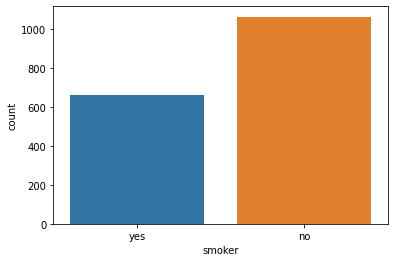

In [3]:
print (data['sex'].value_counts())
sns.countplot(x="sex",data=data)
print(data["smoker"].value_counts())
sns.countplot(x="smoker",data=data)

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


<Axes: xlabel='region', ylabel='count'>

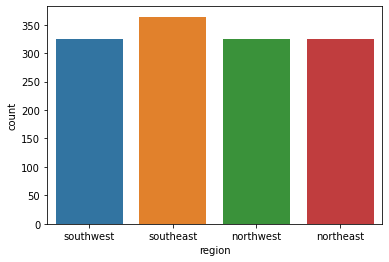

In [4]:
print(data ["region"].value_counts())
sns.countplot(x="region", data=data)

<Axes: >

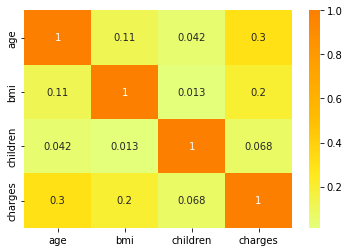

In [5]:
corr=data.corr()
sns.heatmap(corr,cmap="Wistia",annot=True)

In [6]:
from sklearn import linear_model #hoi quy tuyen tinh
model =linear_model.LinearRegression()
model.fit(X=pd.DataFrame (data['age']),
          y=data['charges'])
print ("He so intercept la :", model.intercept_) 
print ("He so coeffient la:", model.coef_)
model.score(X=pd.DataFrame (data['age']),
          y=data['charges'])

He so intercept la : 3165.885006063021
He so coeffient la: [257.72261867]


0.08940589967885804

In [7]:
y_pred=model.predict (X=pd.DataFrame (data['age']))
print(y_pred)

[ 8062.61476073  7804.89214207 10382.11832874 ...  7804.89214207
  8578.05999807 18886.96474474]


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


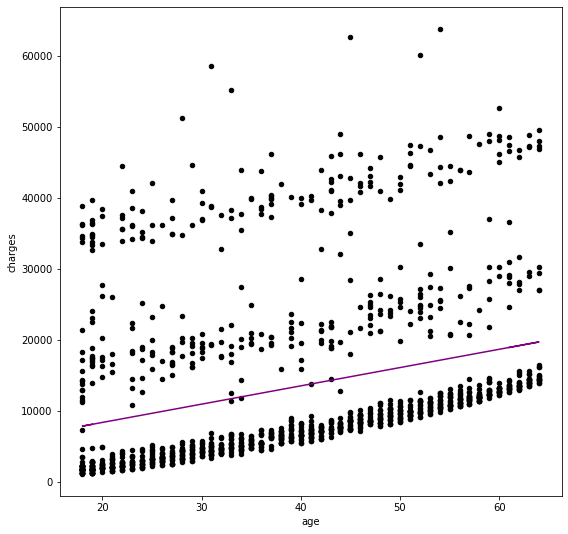

In [8]:
data.plot (kind= "scatter",x="age",
           y= "charges", figsize=(9,9),
           color = "black")
plt.plot(data["age"],y_pred,color ="purple")

In [9]:
model =linear_model.LinearRegression()
X = pd.DataFrame([data["age"],data["age"]**2]).T
y= data["charges"]
model.fit (X,y)
print ('Intercept cua mo hinh :', model.intercept_)
print ("Coeffient cua mo hinh :", model.coef_)
print ('Do chinh xac cua mo hinh :', model.score(X,y))

Intercept cua mo hinh : 6508.552679699116
Coeffient cua mo hinh : [64.57305277  2.43890871]
Do chinh xac cua mo hinh : 0.09059354818621057


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


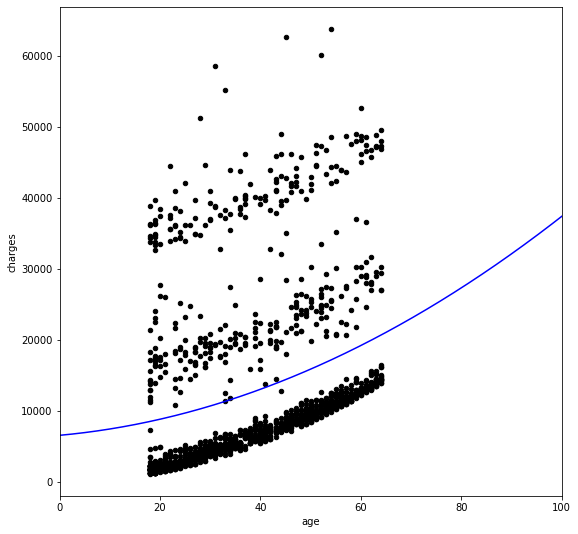

In [10]:
import numpy as np 
range = np.arange (0,101,0.1)
X_range = pd.DataFrame ([range , range **2]).T
y_pred=model.predict (X=X_range)
data.plot (kind="scatter",x="age",
           y= "charges",figsize =(9,9),color='black',
           xlim=(0,100))
plt.plot(range , y_pred,color="blue")